## Import Statements

In [172]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

## Formatting 

In [173]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [174]:
# Reading the csv file with the data we will use to train our model
address = '/Users/ronithummaluru/Desktop/Exercise File/train.csv'
fields = ['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscribed']
# Naming the features included in the data set and separating them into columns 
banking_training = pd.read_csv(address, sep=";", header=None, names=fields,dtype='unicode')
banking_training = banking_training.drop([0])
print(banking_training.head())

  Age           Job  Marital  Education Default Balance Housing Loan  Contact  \
1  58    management  married   tertiary      no    2143     yes   no  unknown   
2  44    technician   single  secondary      no      29     yes   no  unknown   
3  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
4  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
5  33       unknown   single    unknown      no       1      no   no  unknown   

  Day Month Duration Campaign Pdays Previous Poutcome Subscribed  
1   5   may      261        1    -1        0  unknown         no  
2   5   may      151        1    -1        0  unknown         no  
3   5   may       76        1    -1        0  unknown         no  
4   5   may       92        1    -1        0  unknown         no  
5   5   may      198        1    -1        0  unknown         no  


### Checking to see how many entries we have in the data set

In [175]:
print(banking_training.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         45211 non-null  object
 1   Job         45211 non-null  object
 2   Marital     45211 non-null  object
 3   Education   45211 non-null  object
 4   Default     45211 non-null  object
 5   Balance     45211 non-null  object
 6   Housing     45211 non-null  object
 7   Loan        45211 non-null  object
 8   Contact     45211 non-null  object
 9   Day         45211 non-null  object
 10  Month       45211 non-null  object
 11  Duration    45211 non-null  object
 12  Campaign    45211 non-null  object
 13  Pdays       45211 non-null  object
 14  Previous    45211 non-null  object
 15  Poutcome    45211 non-null  object
 16  Subscribed  45211 non-null  object
dtypes: object(17)
memory usage: 6.2+ MB
None


# VARIABLE DESCRIPTIONS

1 - Age (numeric)<br>
2 - Job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")<br>
3 - Marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
4 - Education (categorical: "unknown","secondary","primary","tertiary")<br>
5 - Default: has credit in default? (binary: "yes","no")<br>
6 - Balance: average yearly balance, in euros (numeric)<br>
7 - Housing: has housing loan? (binary: "yes","no")<br>
8 - Loan: has personal loan? (binary: "yes","no")<br>
9 - Contact: contact communication type (categorical: "unknown","telephone","cellular")<br>
10 - Day: last contact day of the month (numeric)<br>
11 - Month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
12 - Duration: last contact duration, in seconds (numeric)<br>
13 - Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
15 - Previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - Poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

Output variable (desired target):<br>
17 - Subscribed - has the client subscribed a term deposit? (binary: "yes","no")



### Checking to see how many unique characters are within each feature and which features we will have to encode into binary

In [176]:
banking_training.describe()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Subscribed
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


#### Cleaning the data by dropping certain features which aren't as relevant in determining whether a customer will subscribe or not

In [211]:
# Some features were dropped because a majority of the data was a singular value which was essentailly considered 
#"unknown"

banking_data = banking_training.drop(['Default', 'Day', 'Month', 'Pdays', 'Previous', 'Poutcome'], axis=1)
banking_data.head()

,Age,Job,Marital,Education,Balance,Housing,Loan,Contact,Duration,Campaign,Subscribed
1,58,management,married,tertiary,2143,yes,no,unknown,261,1,no
2,44,technician,single,secondary,29,yes,no,unknown,151,1,no
3,33,entrepreneur,married,secondary,2,yes,yes,unknown,76,1,no
4,47,blue-collar,married,unknown,1506,yes,no,unknown,92,1,no
5,33,unknown,single,unknown,1,no,no,unknown,198,1,no


### Encoding the features with two unique values into binary 

In [178]:
from sklearn.preprocessing import LabelEncoder
# 1 = customer has a housing loan / 0 = customer doesn't have a housing loan
label_encoder = LabelEncoder()
housing_cat = banking_data['Housing']
housing_encoded = label_encoder.fit_transform(housing_cat)
housing_encoded[0:5]

array([1, 1, 1, 1, 0])

In [179]:
# 1 = customer has a personal loan / 0 = customer doesn't have a personal loan
label_encoder = LabelEncoder()
loan_cat = banking_data['Loan']
loan_encoded = label_encoder.fit_transform(loan_cat)
loan_encoded[0:5]

array([0, 0, 1, 0, 0])

In [180]:
# 1 = customer has subscribed / 0 = customer hasn't subscribed
label_encoder = LabelEncoder()
sub_cat = banking_data['Subscribed']
sub_encoded = label_encoder.fit_transform(sub_cat)
sub_encoded[0:5]

array([0, 0, 0, 0, 0])

In [181]:
housing_DF = pd.DataFrame(housing_encoded, columns=['housing_loan'])
loan_DF = pd.DataFrame(loan_encoded , columns=['personal_loan'])
sub_DF = pd.DataFrame(sub_encoded , columns=['subscribed'])
bin_DF = pd.concat([housing_DF, loan_DF, sub_DF], axis=1, verify_integrity=True).astype(float)
bin_DF.head()

,housing_loan,personal_loan,subscribed
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


## Utilizing OneHotEncoder, we are encoding the categorical features which have more than 2 unique values

In [182]:
job_cat = banking_data['Job']
job_encoded = label_encoder.fit_transform(job_cat)
job_encoded[0:100]

array([ 4,  9,  2,  1, 11,  4,  4,  2,  5,  9,  0,  0,  9,  9,  7,  5,  0,
        1,  5,  7,  1,  4,  1,  7,  5,  0,  4,  2,  4,  9,  9,  4,  0,  1,
        4,  9,  1,  9,  0,  0,  7,  4,  1,  5,  5,  0,  6,  9,  9,  4,  1,
        4,  4,  0,  9,  2,  4,  1,  1,  7,  0,  9,  1,  7,  1,  4,  5,  4,
        9,  1,  1,  7,  4,  1,  9,  9,  1,  7,  7,  7,  0,  7,  9,  0,  6,
        1,  0,  9,  4,  5,  4,  9,  0,  1,  2,  4,  1,  5,  9,  4])

In [183]:
from sklearn.preprocessing import OneHotEncoder
# 1 = customer has a job in that field / 0 = customer doesn't have a job in that field
binary_encoder = OneHotEncoder(categories='auto')
job_1hot = binary_encoder.fit_transform(job_encoded.reshape(-1,1))
job_1hot_mat = job_1hot.toarray()
job_DF = pd.DataFrame(job_1hot_mat, columns = ["admin","other job","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services"])
job_DF.head()

,admin,other job,unemployed,management,housemaid,entrepreneur,student,blue-collar,self-employed,retired,technician,services
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [184]:
# 1 = customer is in that type of relationship / 0 = customer is not in that type of relationship
marital_cat = banking_data['Marital']
martial_encoded = label_encoder.fit_transform(marital_cat)
marital_1hot = binary_encoder.fit_transform(martial_encoded.reshape(-1,1))
marital_1hot_mat = marital_1hot.toarray()
mar_DF = pd.DataFrame(marital_1hot_mat, columns = ["married","divorced","single"])
mar_DF.head()


,married,divorced,single
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [185]:
# 1 = customer's highest form of education / 0 = not the customers highest form of education
edu_cat = banking_data['Education']
edu_encoded = label_encoder.fit_transform(edu_cat)
edu_1hot = binary_encoder.fit_transform(edu_encoded.reshape(-1,1))
edu_1hot_mat = edu_1hot.toarray()
edu_DF = pd.DataFrame(edu_1hot_mat, columns = ["unknown education","secondary","primary","tertiary"])
edu_DF.head()

,unknown education,secondary,primary,tertiary
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [186]:
# 1 = customer can be contacted with this form of communication 
# 0 = customer cannot be contacted with this form of communication
contact_cat = banking_data['Contact']
con_encoded = label_encoder.fit_transform(contact_cat)
con_1hot = binary_encoder.fit_transform(con_encoded.reshape(-1,1))
con_1hot_mat = con_1hot.toarray()
con_DF = pd.DataFrame(con_1hot_mat, columns = ["not known","telephone","cellular"])
con_DF.head()

,not known,telephone,cellular
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [187]:
multi_DF = pd.concat([job_DF, mar_DF, edu_DF, con_DF], axis=1, verify_integrity=True).astype(float)
encoded_DF = pd.concat([bin_DF, multi_DF], axis=1, verify_integrity=True).astype(float)
encoded_DF.head(6)

,housing_loan,personal_loan,subscribed,admin,other job,unemployed,management,housemaid,entrepreneur,student,...,married,divorced,single,unknown education,secondary,primary,tertiary,not known,telephone,cellular
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Concatinating all of the new encoded data while simultaneously filtering out the old unfiltered data

In [188]:
#Final data frame which will be used for the Logistic Regression Model
banking_data = banking_data.drop(['Job', 'Marital', 'Education', 'Housing', 'Loan', 'Contact', 'Subscribed'], axis=1)
banking_dmy = pd.concat([banking_data, encoded_DF], axis=1, verify_integrity=True)
banking_dmy = banking_dmy.drop([0])
banking_dmy.head()

,Age,Balance,Duration,Campaign,housing_loan,personal_loan,subscribed,admin,other job,unemployed,...,married,divorced,single,unknown education,secondary,primary,tertiary,not known,telephone,cellular
1,58,2143,261,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,44,29,151,1,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,33,2,76,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,47,1506,92,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,33,1,198,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Confirming the assumptions that need to be made for a Logistic Regression

### Double Checking that our target variable is binary

<AxesSubplot:xlabel='subscribed', ylabel='count'>

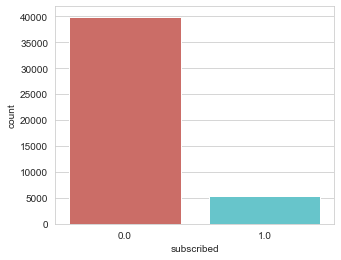

In [189]:
sb.countplot(x='subscribed', data=banking_dmy, palette='hls')

### Checking for missing values

In [190]:
banking_dmy.isnull().sum()

Age                  0
Balance              0
Duration             0
Campaign             0
housing_loan         1
personal_loan        1
subscribed           1
admin                1
other job            1
unemployed           1
management           1
housemaid            1
entrepreneur         1
student              1
blue-collar          1
self-employed        1
retired              1
technician           1
services             1
married              1
divorced             1
single               1
unknown education    1
secondary            1
primary              1
tertiary             1
not known            1
telephone            1
cellular             1
dtype: int64

### Taking care of missing values and checking to see if dataset size is sufficient

In [191]:
# Dropping all the null values
banking_dmy.dropna(inplace=True)
banking_dmy.reset_index(inplace=True, drop=True)
banking_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                45210 non-null  object 
 1   Balance            45210 non-null  object 
 2   Duration           45210 non-null  object 
 3   Campaign           45210 non-null  object 
 4   housing_loan       45210 non-null  float64
 5   personal_loan      45210 non-null  float64
 6   subscribed         45210 non-null  float64
 7   admin              45210 non-null  float64
 8   other job          45210 non-null  float64
 9   unemployed         45210 non-null  float64
 10  management         45210 non-null  float64
 11  housemaid          45210 non-null  float64
 12  entrepreneur       45210 non-null  float64
 13  student            45210 non-null  float64
 14  blue-collar        45210 non-null  float64
 15  self-employed      45210 non-null  float64
 16  retired            452

### Checking for independence between features

<AxesSubplot:>

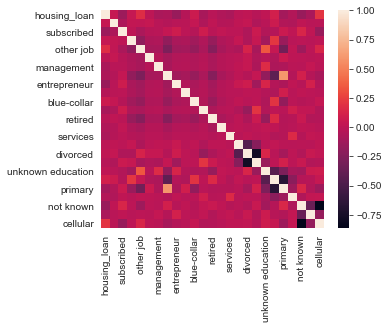

In [192]:
sb.heatmap(banking_dmy.corr())

In [193]:
X_train, X_test, y_train, y_test = train_test_split(banking_dmy.drop('subscribed', axis=1),
                                                   banking_dmy['subscribed'], test_size=0.2,
                                                   random_state=200)

In [194]:
print(X_train.shape)
print(y_train.shape)

(36168, 28)
(36168,)


In [195]:
X_train[0:5]

,Age,Balance,Duration,Campaign,housing_loan,personal_loan,admin,other job,unemployed,management,...,married,divorced,single,unknown education,secondary,primary,tertiary,not known,telephone,cellular
36358,29,558,142,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12498,30,1717,218,2,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29040,60,358,95,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8798,29,-37,182,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16762,31,33,901,2,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Depolying our Logistic Regression Model

In [196]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [197]:
y_pred = LogReg.predict(X_test)

### Evaluating the Model

In [198]:
# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best 
# value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

# With an F1 score of .88 we can see that our model has a good amount of precision and recall, although
# there is still room to improve with further optimization
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7984
         1.0       0.40      0.00      0.00      1058

    accuracy                           0.88      9042
   macro avg       0.64      0.50      0.47      9042
weighted avg       0.83      0.88      0.83      9042



In [199]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[31926,    11],
       [ 4223,     8]])

### Making a test prediction

In [206]:
pd.set_option("display.max_columns", None) 
banking_dmy[863:864]

,Age,Balance,Duration,Campaign,housing_loan,personal_loan,subscribed,admin,other job,unemployed,management,housemaid,entrepreneur,student,blue-collar,self-employed,retired,technician,services,married,divorced,single,unknown education,secondary,primary,tertiary,not known,telephone,cellular
863,40,1265,97,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [208]:
test_customer = np.array([40, 1265, 97, 0, 0, 0, 1, 0, 1, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]).reshape(1,-1)

# Based off the results, there's a 91% chance of this customer not subscribing for the term deposit and a 9% chance 
# of this customer subscribing
print(LogReg.predict(test_customer))
print(LogReg.predict_proba(test_customer))

[0.]
[[0.91378255 0.08621745]]
